In [3]:
# 이상치 처리
import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs

# 정규분포 데이터의 경우 데이터를 둘러싼 타원을 그리고 타원을 벗어난 데이터를 이상치로 분류
# 모의 데이터
features, _=make_blobs(n_samples=10, n_features=2, centers=1, random_state=1)

# 첫 번째 샘플을 이상치로 변경
features[0,0]=10
features[0,1]=10

# 이상치 감지 객체
# contamination: 이상치의 예상 비율
outlier_detector=EllipticEnvelope(contamination=0.1)

# 감지 객체를 훈련
outlier_detector.fit(features)

# 이상치를 예측
outlier_detector.predict(features) # -1 이상치, 1 정상

array([-1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [5]:
# 하나의 특성을 만들고
feature=features[:,0]

# 이상치의 인덱스를 반환하는 함수
def indicies_of_outliers(x):
    # 1, 3분위수
    q1, q3=np.percentile(x,[25,75])
    # 사분위범위
    iqr=q3-q1
    # 1사분위수보다 1.5 iqr 이상 작은 값
    lower_bound=q1-iqr*1.5
    # 3사분위수보다 1.5 iqr 이상 큰 값
    upper_bound=q3+iqr*1.5
    return np.where((x>upper_bound) | (x<lower_bound))

# 함수를 실행
indicies_of_outliers(feature) # 0번 샘플을 찾아냄

(array([0], dtype=int64),)

In [6]:
# 이상치 다루기
import pandas as pd

# 데이터프레임
houses=pd.DataFrame()
houses['Price'] = [534433, 392333, 293222, 4322032]
houses['Bathrooms'] = [2, 3.5, 2, 116]
houses['Square_Feet'] = [1500, 2500, 1500, 48000]
houses # 3번이 이상치

,Price,Bathrooms,Square_Feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500
3,4322032,116.0,48000


In [7]:
# 1. 이상치를 제거
houses[houses['Bathrooms']<20]

,Price,Bathrooms,Square_Feet
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500


In [8]:
# 2. Outlier 필드를 추가하고 표시함
import numpy as np
# 불리언 조건을 기반으로 특성
houses['Outlier']=np.where(houses['Bathrooms']<20, 0, 1)
# 데이터를 확인
houses

,Price,Bathrooms,Square_Feet,Outlier
0,534433,2.0,1500,0
1,392333,3.5,2500,0
2,293222,2.0,1500,0
3,4322032,116.0,48000,1


In [9]:
# 이상치의 영향이 줄어들도록 특성을 변환함
# 로그 특성
houses["Log_Of_Square_Feet"]=[np.log(x) for x in houses["Square_Feet"]]
# 데이터를 확인
houses

,Price,Bathrooms,Square_Feet,Outlier,Log_Of_Square_Feet
0,534433,2.0,1500,0,7.313220
1,392333,3.5,2500,0,7.824046
2,293222,2.0,1500,0,7.313220
3,4322032,116.0,48000,1,10.778956


In [10]:
# 특성 이산화
import numpy as np
from sklearn.preprocessing import Binarizer
# 특성
age=np.array([[6],[12],[20],[36],[65]])
# 18세를 기준으로 0,1로 구분
binarizer=Binarizer(threshold=18)
# 특성을 반환
binarizer.fit_transform(age)

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [11]:
# 특성 구분
# 20 30, 64를 기준으로 4개로 구분
np.digitize(age, bins=[20,30,64])

array([[0],
       [0],
       [1],
       [2],
       [3]], dtype=int64)

In [12]:
# 특성 구분
# 0~20 21~30, 31~64, 마지막 숫자를 구간에 포함시킴
np.digitize(age, bins=[20,30,64], right=True)

array([[0],
       [0],
       [0],
       [2],
       [3]], dtype=int64)

In [13]:
# 특성 구분
# 18세를 기준으로 0,1로 구분
np.digitize(age, bins=[18])

array([[0],
       [0],
       [1],
       [1],
       [1]], dtype=int64)

In [14]:
from sklearn.preprocessing import KBinsDiscretizer

# 3개의 구간
kb=KBinsDiscretizer(3, encode='ordinal', strategy='quantile')
print(kb.fit_transform(age))
print(kb.bin_edges_) # 구간 정보

[[0.]
 [0.]
 [1.]
 [2.]
 [2.]]
[array([ 6.        , 14.66666667, 30.66666667, 65.        ])]


In [15]:
# 원-핫 인코딩을 반환
kb=KBinsDiscretizer(4, encode='onehot-dense', strategy='quantile')
kb.fit_transform(age)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [16]:
# 6~65를 동일한 길이의 4개의 구간으로 나눔
kb=KBinsDiscretizer(4, encode='onehot-dense', strategy='uniform')
kb.fit_transform(age)

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [17]:
kb.bin_edges_

array([array([ 6.  , 20.75, 35.5 , 50.25, 65.  ])], dtype=object)

In [18]:
### 군집으로 샘플을 그룹으로 묶기
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 모의 특성 행렬
features,_=make_blobs(n_samples=50, n_features=2, centers=3, random_state=1)

# 데이터프레임
df=pd.DataFrame(features, columns=["feature_1","feature_2"])

# k-평균 군집 모델을 사용하여 라벨을 만들고 분류 등에 사용할 수 있음
# (전처리 단계에서 클러스터링을 사용해 보는 예제)
clusterer=KMeans(3, random_state=0)

# 모델을 훈련
clusterer.fit(features)

# 그룹 소속을 예측
df["group"]=clusterer.predict(features)

# 처음 몇 개의 샘플을 조회
df.head(5)

,feature_1,feature_2,group
0,-9.877554,-3.336145,0
1,-7.287210,-8.353986,2
2,-6.943061,-7.023744,2
3,-7.440167,-8.791959,2
4,-6.641388,-8.075888,2


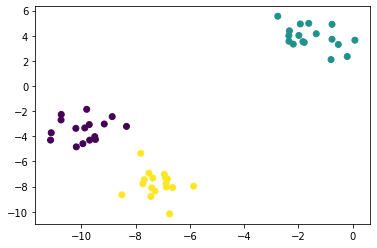

In [19]:
import matplotlib.pyplot as plt
plt.scatter(df['feature_1'], df['feature_2'], c=df['group'])